In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv    

Melakukan import library untuk mengolah citra. menggunakan numpy untuk mengolah matriks gambar, mathplotlib digunakan untuk visualisasi data, termasuk visualisasi gambar, dan opencv digunakan untuk pengolahan citra dan pengenalan pola

membaca citra senhe dengan menggunakan plt.imread dengan parameter lokasi file dalam folder. menggunakan plt.imshow untuk menampilkan gambar dengan mengunci color pada warna abu.

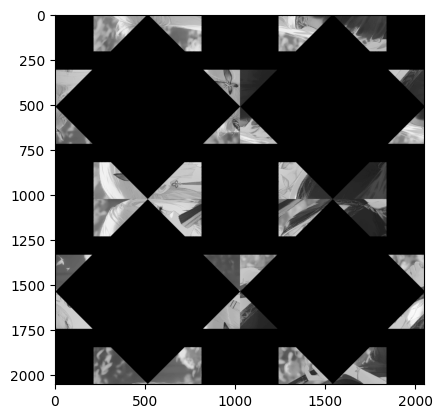

In [4]:
image = plt.imread('senheScramble.jpg')

plt.imshow(image, cmap='gray')

In [5]:
panjang, lebar = image.shape

membuat var global untuk panjang dan lebar dengan mengambil referensi dari citra senhe

In [6]:
def split_image(img, row_sizes, col_sizes):
    pecahan = []

    for i in range(1, len(row_sizes)):
        for j in range(1, len(col_sizes)):
            chunk = img[sum(row_sizes[1:i]):sum(row_sizes[1:i+1]), sum(col_sizes[1:j]):sum(col_sizes[1:j+1])]
            pecahan.append(chunk)

    return pecahan

row_sizes = [0, 256, 256, 256, 256, 256, 256, 256, 256] 
col_sizes = [0, 1026, 1026]
chunks = split_image(image, row_sizes, col_sizes)

metode split_image dengan parameter citra senhe dan ukuran baris dan kolom dimiliki. pada metode ini membuat var local pecahan dengan tipe array. melakukan for loop untuk mengambil potongan gambar menggunakan batasan loop ukuran dari baris dan kolom citra.

"sum(row_sizes[1:i]) dan sum(col_sizes[1:j])" digunakan untuk menentukan indeks awal dari potongan gambar. bagian ini akan mulai dari 0 untuk potongan pertama dan dihitung sebagai jumlah dari ukuran sebeumnya ditambah dengan ukuran saat ini, hingga batas akhir dari gambar.

"sum(row_sizes[1:i+1]) dan sum(col_sizes[1:j+1])" digunakan untuk mencari indeks terakhir dari porongan gambar, dihitung dengan menjumlahkan ukuran sebelumnya ditambah ukuran saat ini hingga batasan akhir citra.

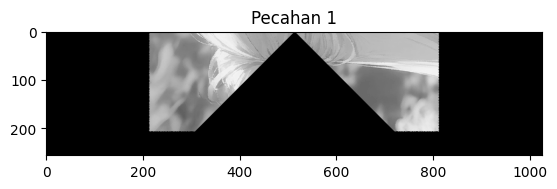

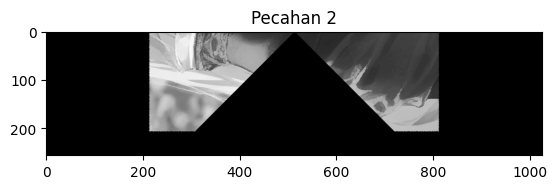

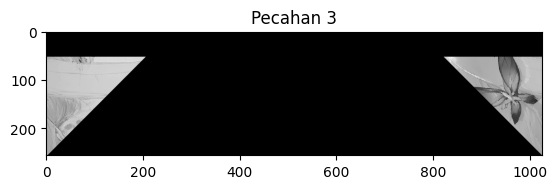

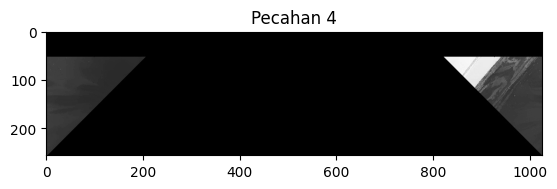

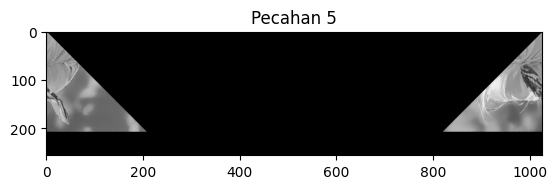

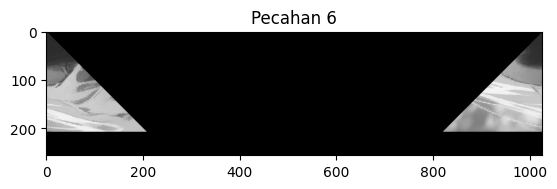

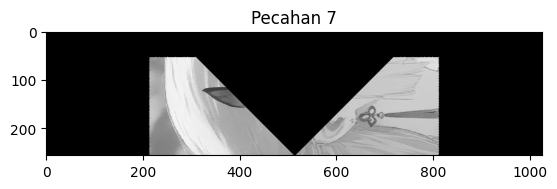

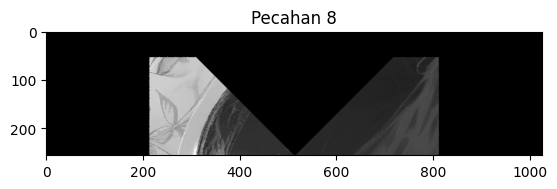

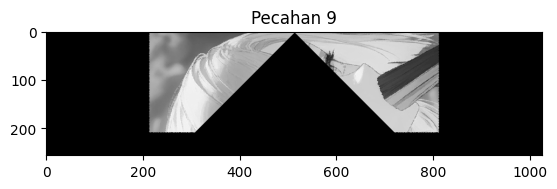

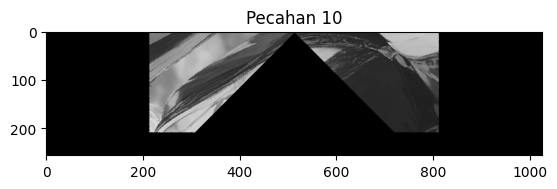

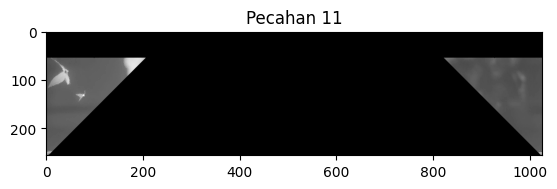

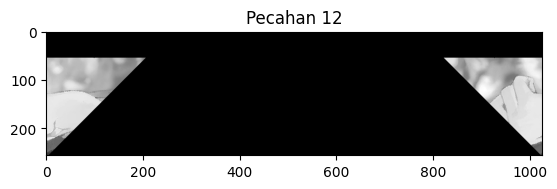

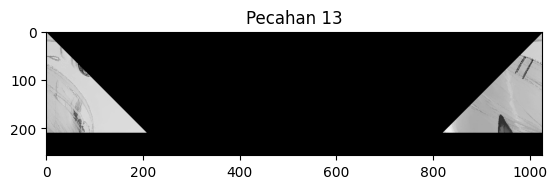

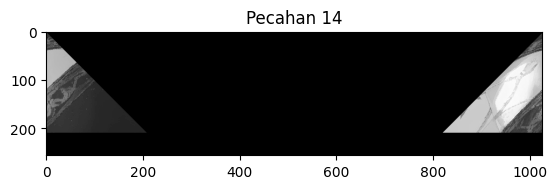

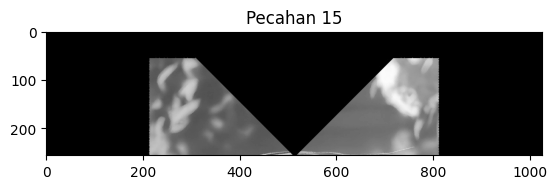

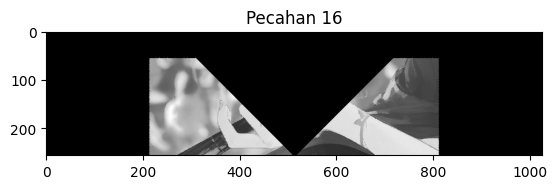

In [7]:
for i in range(len(chunks)):
    plt.imshow(chunks[i], cmap='gray')
    plt.title(f"Pecahan {i + 1}")
    plt.show()

In [8]:
def rotasi(image, derajat=0):
    tinggi, lebar = image.shape
    hasil = np.zeros((tinggi,lebar))
    radian = derajat * np.pi / 180      
    for i in range(tinggi):
        for j in range(lebar):
            x2 = int((i-tinggi/2) * np.cos(radian) - (j-lebar/2) * np.sin(radian) + tinggi/2)
            y2 = int((i-tinggi/2) * np.sin(radian) + (j-lebar/2) * np.cos(radian) + lebar/2)
            if (0 <= x2 <tinggi and 0 <= y2 < lebar):
                hasil[i,j] = image[x2,y2]
    return hasil

def translasi(image, x, y):
    tinggi, lebar = image.shape
    hasil = np.zeros((tinggi, lebar))
    for i in range(tinggi):
        for j in range(lebar):
            hasil[i,j] = image[i-x,j-y]
                
    return hasil

definisi metode rotasi untuk memutar gambar hasil pengolahan dengan menggunakan derajat masukkan dan translasi untuk memindahkan gambar diolah dengan menggunakan parameter image, x dan y untuk posisi citra.

In [10]:
pecahanKecil = []
pecahanBesar = []

membuat var global untuk menyimpan potongan lebih rinci dari citra.

melakukan for loop untuk menyimpan pecahankecil hasil potongan citra dengan melakukan translasi pada potongan citra  sejauh 0-513. menyimpan hasil translasi pada draft2 denganpixel yang diambil pada range 50-(-50). hasil dari itu ditampilkan dan disimpan pada var array pecahanKecil. dilakukan untuk index ke 2-5 dan 10-13.

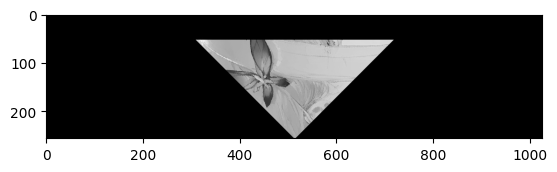

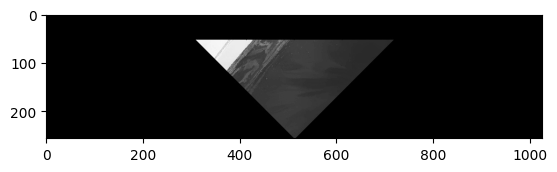

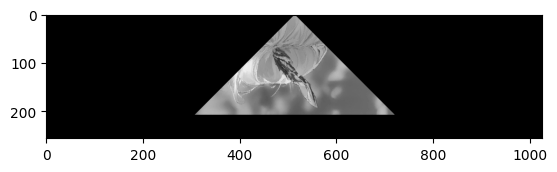

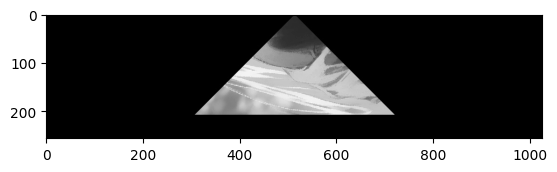

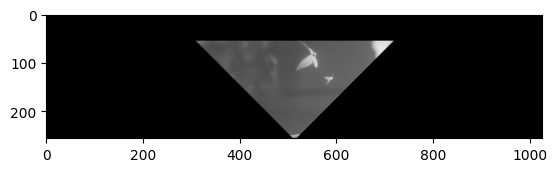

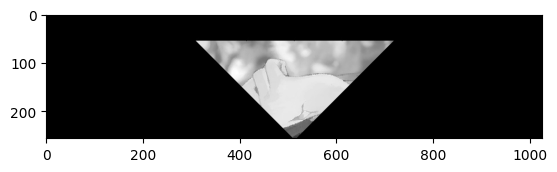

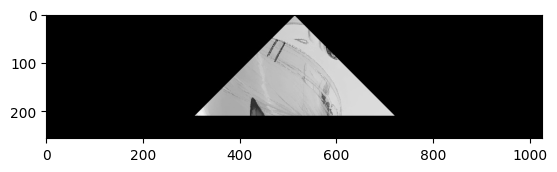

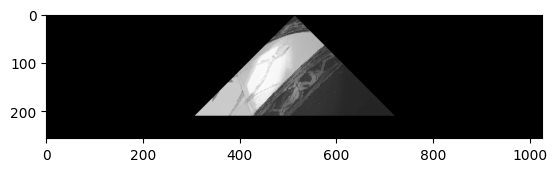

In [11]:
for i in range(2, 6):
    draft1 = translasi(chunks[i], 0, 513)
    draft2 = draft1[50:-50, :]
    plt.imshow(draft1, cmap='gray')
    plt.show()
    pecahanKecil.append(draft1)

for i in range(10, 14):
    draft1 = translasi(chunks[i], 0, 513)
    draft2 = draft1[50:-50, :]
    plt.imshow(draft1, cmap='gray')
    plt.show()
    pecahanKecil.append(draft1)

melakukan for loop dengan batas hingga 2, artinya dipilih hanya 0-1 dan setip bagian dari potongan chunks akan dipilih semua kecuali 50 elemen terakhir, dan hasilnya disimpan pada pecahanBesar.

melakukan for loop dari range yang dipakai 6-9 dan memeriksa jika kurang dari 8, maka elemen selain 50 awal diambil, dan jika tidak, maka selain 50 akhir diambil.

melakukan for loop untuk range dari 14-15, dan akan melakukan pross penyimpanan pada var pecahanBesar sama seperti sebelumnya.

menampilkan hasil pecahanBesar yan tersimpan dengan mengunci warna pada warna abu dan diberikan nama sesuai dengan urutan penyimpanan.

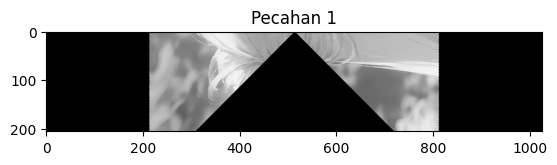

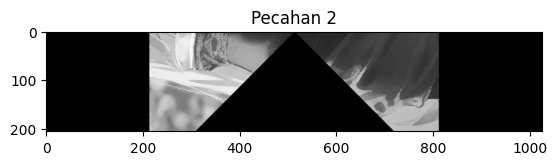

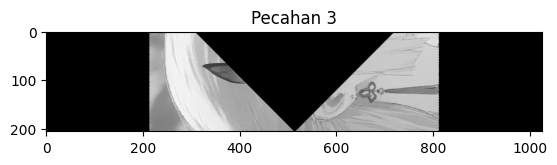

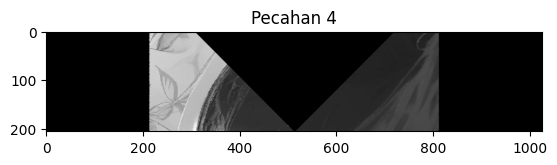

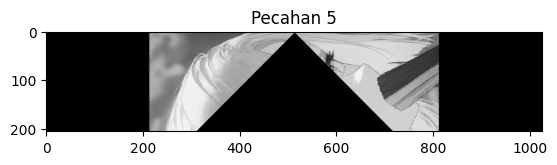

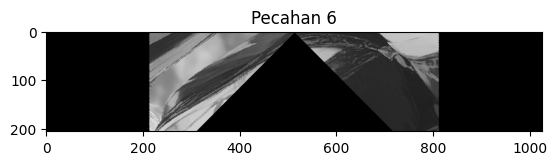

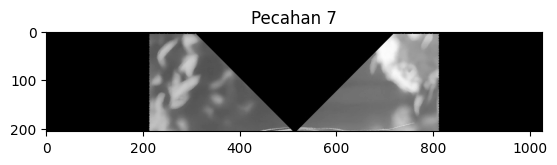

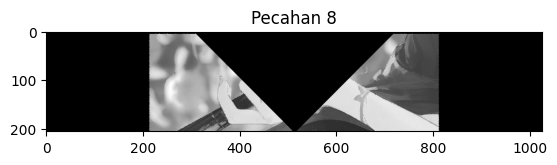

In [12]:
for i in range(2):
    draft1 = chunks[i][:-50]
    pecahanBesar.append(draft1)

for i in range(6, 10):
    if i < 8:
        draft1 = chunks[i][50:]
    else:
        draft1 = chunks[i][:-50]
    pecahanBesar.append(draft1)

for i in range(14, 16):
    draft1 = chunks[i][50:]
    pecahanBesar.append(draft1)

for i in range(8):
    plt.imshow(pecahanBesar[i], cmap='gray')
    plt.title(f"Pecahan {i + 1}")
    plt.show()


In [14]:
def translate_image_gray(a, b):
    result = []
    for row_a, row_b in zip(a, b):
        result_row = []
        for pixel_a, pixel_b in zip(row_a, row_b):
            if pixel_b == 255:
                result_row.append(255)
            else:
                result_row.append(pixel_a)
        result.append(result_row)
    return resulttran

hasil_translasi = translate_image_gray(pecahanKecil, pecahanBesar)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [15]:
def move_pixels(image, source_x, source_y, dest_x, dest_y):
    # Salin nilai piksel dari lokasi sumber ke lokasi tujuan
    image[dest_y, dest_x] = image[source_y, source_x]
    # Hapus nilai piksel dari lokasi sumber
    image[source_y, source_x] = 0
source_x, source_y = 200, 315
dest_x, dest_y = 415, 315

move_pixels(gabungan[0], source_x, source_y, dest_x, dest_y)
print("\nCitra setelah pemindahan:")
plt.imshow(gabungan[0])

NameError: name 'gabungan' is not defined

## EKUALISASI CITRA

membaca gambar pada folder, kemudian diberikan perubahan warna dari BGR ke Gray menggunakan cvtColor yang akan mengubah warna citra menjadi keabuan dan pada penampilannya harus memakai cmap untuk mengunci warna pada warna abu.

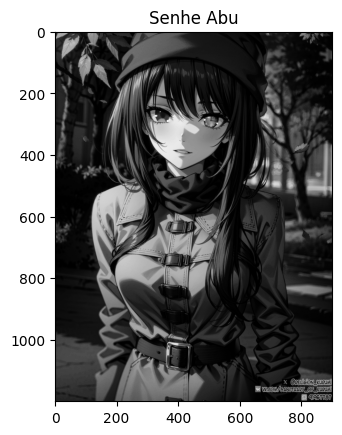

In [16]:
gambar = plt.imread('kurumi.jpg')
Gambarabu=cv.cvtColor(gambar,cv.COLOR_BGR2GRAY)
plt.title("Senhe Abu")
plt.imshow(Gambarabu, cmap="gray", vmin=0, vmax=255)

In [17]:
tinggi, lebar = Gambarabu.shape
numbit = 256

histogram_norm = np.zeros(numbit, dtype=int)

for i in range(tinggi):
    for j in range(lebar):
        npixel = Gambarabu[i, j]
        histogram_norm[npixel] += 1


cdf_histogram = np.cumsum(histogram_norm)
cdf_histogram = cdf_histogram / cdf_histogram[-1]



membuat var tinggi, lebar untuk menyimpan tuple yang berisi ukuran panjang dan lebar dari gambar.
var numbit untuk memberikan batasan jumlah picel yang bisa dipakai.
var histogram_norm digunakan untuk menyimpan frekuensi kemunculannilai intensitas dari sebuah pixel, dengan membuat array kosong sebanyak numbit.

melakukan nested loop dengan range tinggi dan lebar yang akan mengambil intensitas pxel posisi ke i,j dan disimpan pada var npixel. ini digunakan untuk posisi pada histogram_norm untuk menjumlahkan banyak intensitas pada posisi pixel tersebut.

cdf_histogram akan menghitung secara kumulati dari jummalh semua nilai intensitas yang ada di histogram_norm dengan menggunakan lib np pada cumsum().

kemudian cdf_histogram akan membagi nilai dirinya dengan nilai dari pada posisi -1 yang dimiliki untuk menghasilkan CDF yang dinormalisasi dalam rentang 0 hingga 1

menampilkan histogram normalisasi untuk citra abu gambar.

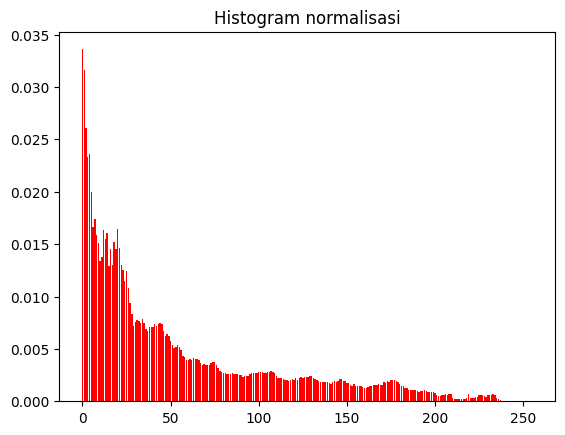

In [19]:
plt.title("Histogram normalisasi")
sumbX = [x for x in range (numbit)]
histo_norm = plt.bar(sumbX, histogram_norm / (tinggi * lebar), color='red')
plt.show()

menampilkan histogram dari cdf yang didapatkan pada gambar

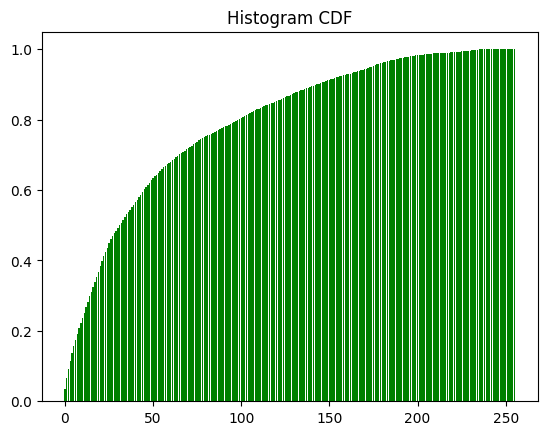

In [20]:
plt.title("Histogram CDF")
histo_cdf = plt.bar(sumbX, cdf_histogram, color='green')
plt.show()

In [21]:
def histogram_equalization(img):
    hist = np.zeros(256).astype(int)
    height, width = img.shape

    for i in range(height):
        for j in range(width):
            val = img[i, j]
            hist[val] += 1
    
    cdf = np.cumsum(hist)

    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype('uint8')

    result = cdf_normalized[img]
    
    return result

membuat metode histogram_equalization dengan parameter gambar, metode digunakan untuk mendapatakn hasil equalisasi histogram.

membuat var hist yang akan menympan array kosong sebagai nilai pixel yang memungkinkan dipakai sebanyak 0-255.

membuat var height dan width untuk mendapatkan diensi dari gambar dipakai.

melakukan nested loop berdasarkan ukuran height dan width untuk mengambil nilai intensitas pixel pada posisi i,j terus menerus yang mana frekuensi kemunculannya akan di inkeremen pada var hist.

lalu membuat var yang akan menyimpan nilai frekuensi dari kemunculan nilai intensitas pixel hingga pixel terakhir.

kemudian membuat var cdf_normalized untuk menyimpan hasil perhitungan normalisasi dengan mengurangi nilai minimum cdf dari setiap elemen, kemudian dikalikan 255 dan dibagi dengan hasil dari pengurangan nilai terbesar dan terkecil dari cdf.

mengubah tipe data dari CDF yang dinormalisasi menjadi tipe data unsigned integer 8-bit (uint8). digunakan karena nilai intensitas piksel dalam gambar biasanya menggunakan format 8-bit



Menyimpan hasil ekualisasi pada var result dan kemudian membuat histogram dengan mengubah result menjadi array 1 dimensi dengan memakai distribusi /interval data sebanyak 256(0-255) dan menampilkannya dengan menampilkan gambar pada result.

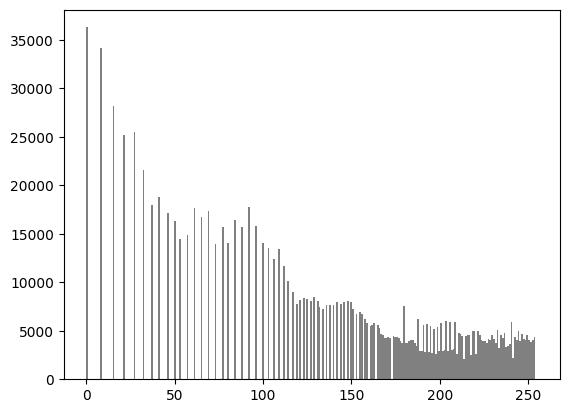

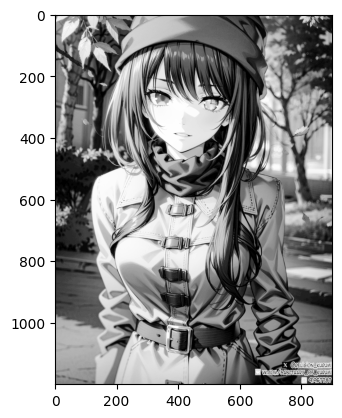

In [22]:
result = histogram_equalization(Gambarabu)
plt.hist(result.flatten(), bins=256, color='gray')
plt.show()
plt.imshow(result, cmap="gray")

## SPESIFIKASI CITRA TERHADAP KURUMI DAN MEGUMIN

Membaca citra kurumi dengan imread dan diubah menjadi warna abu menggunakn cvtColor dari bgr ke gray. dan memberikan nama pada citra lalu ditampilkan 

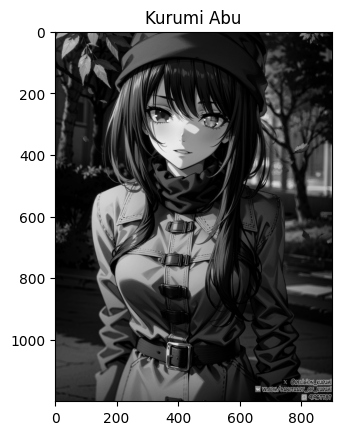

In [25]:
gambarkurumi = plt.imread('kurumi.jpg')
Gambarabukurumi=cv.cvtColor(gambarkurumi,cv.COLOR_BGR2GRAY)
plt.title("Kurumi Abu")
plt.imshow(Gambarabukurumi, cmap="gray", vmin=0, vmax=255)

Membaca citra megumin dengan imread dan diubah menjadi warna abu menggunakn cvtColor dari bgr ke gray. dan memberikan nama pada citra lalu ditampilkan 

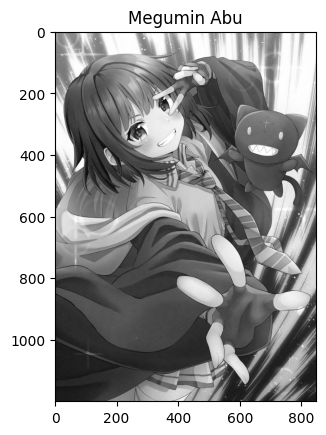

In [27]:
gambarmegumin = plt.imread('megumin.jpg')
Gambarabumegumin=cv.cvtColor(gambarmegumin,cv.COLOR_BGR2GRAY)
plt.title("Megumin Abu")
plt.imshow(Gambarabumegumin, cmap="gray", vmin=0, vmax=255)

In [28]:
def hist(img, level):
    hist_gray = np.zeros(level)
    h,w = img.shape    
    for i in range(h): 
        for j in range(w): 
            hist_gray[ img[i,j] ] += 1  
    grays = [i for i in range(level)] 
    plt.bar(grays, hist_gray)

def compare_hist(img1, img2):
    plt.figure(figsize=(8,4)) 
    plt.subplot(121)
    hist(img1, 256)
    plt.subplot(122)
    hist(img2, 256) 

def find_target(img, level):
    hist = np.zeros(level).astype(int)
    tinggi, lebar = img.shape
    for i in range(tinggi ):
        for j in range(lebar):
            hist[img[i,j]] +=1
    gldc = np.zeros(level).astype(int)
    for i in range(level):
            gldc[i] = np.sum( hist[0:i+1] )
    target_value = gldc*(level-1)/(tinggi*lebar)
    target_value = np.floor(target_value).astype(int)
    return target_value

target1 = find_target(result, 256)
target2 = find_target(Gambarabukurumi, 256)

def find_closest_color(nilai, tujuan):
    min = abs(nilai-tujuan[0])
    warna_min = 0
    for i in range(len(tujuan)):
        cheking = abs(nilai-tujuan[i])
        if(min > cheking):
            min = cheking
            warna_min = i
    return warna_min

map = np.zeros(256, dtype=int)
for i in range(256):
    map[i] = find_closest_color(target1[i], target2)

result1 = np.zeros(result.shape).astype(int)
for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        result1[i, j] = map[result[i, j]]


"hist(img, level)" digunakan untuk menghitung histogram dari citra keabuan. dilakukan dengan mengitersai setiap picel daam citra dan menaikkan frekuensi dari dari kemunculan nilai intensitas pixel dalam histogram. kemudian di plot dengan plt.bar dengan intensitas pixel sebagai x dan frekuensi kemunculan sebagai y.

"compare_hist(img1, img2)" diguakan membandingkan histogram dari dua citra yang akan menghasilkan dua subplot, 1 untuk masing-masing citra dengan ukuran gambar 8x4. setiap subplot menampilkan histogram dari citra yang sesuai menggunakan hist().

"find_target(img, level)" digunakan untuk mencari nilai target yang digunakan dalam proses pemetaan histogram. proses melibatkan perhitungan histogram dan hasil cdf histogram dari citra. target dihitung dengan mengalikan cdf histogram dengan jumlah level minus satu, dan kemudian membaginya dengan ukuran citra. kemudian dibulatkan ke nilai integer terdekat.

"find_closest_color(nilai, tujuan)" digunakan untuk mencari nilai warna terdekat dari nilai yang diberikan dalam target. Proses ini melibatkan iterasi melalui semua elemen dalam target untuk mencari nilai absolut perbedaan terkecil dengan nilai yang diberikan.



menampilkan compare dari hasil kedua histogram

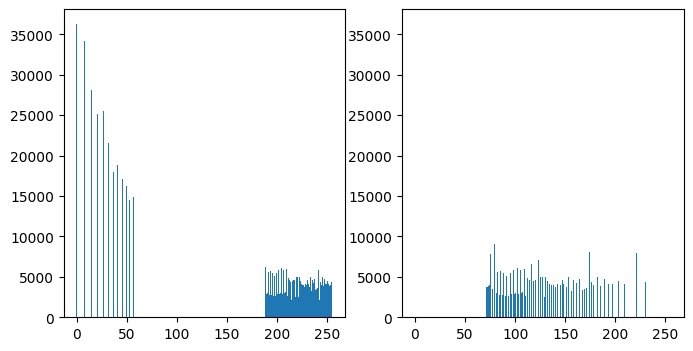

In [30]:
compare_hist(result, result1)

metode yang digunakan sama seperti di atas

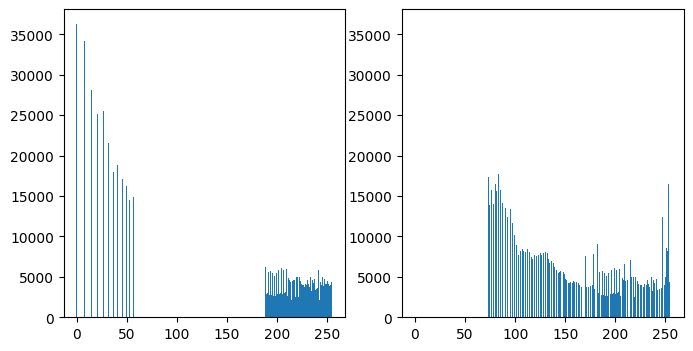

In [31]:
def hist(img, level):
    hist_gray = np.zeros(level)
    h,w = img.shape    
    for i in range(h): 
        for j in range(w): 
            hist_gray[ img[i,j] ] += 1  
    grays = [i for i in range(level)] 
    plt.bar(grays, hist_gray)

def compare_hist(img1, img2):
    plt.figure(figsize=(8,4)) 
    plt.subplot(121)
    hist(img1, 256)
    plt.subplot(122)
    hist(img2, 256) 

def find_target(img, level):
    hist = np.zeros(level).astype(int)
    tinggi, lebar = img.shape
    for i in range(tinggi ):
        for j in range(lebar):
            hist[img[i,j]] +=1
    gldc = np.zeros(level).astype(int)
    for i in range(level):
            gldc[i] = np.sum( hist[0:i+1] )
    target_value = gldc*(level-1)/(tinggi*lebar)
    target_value = np.floor(target_value).astype(int)
    return target_value

target1 = find_target(result, 256)
target3 = find_target(Gambarabumegumin, 256) 
def find_closest_color(nilai, tujuan):
    min = abs(nilai-tujuan[0])
    warna_min = 0
    for i in range(len(tujuan)):
        cheking = abs(nilai-tujuan[i])
        if(min > cheking):
            min = cheking
            warna_min = i
    return warna_min

map = np.zeros(256, dtype=int)
for i in range(256):
    map[i] = find_closest_color(target1[i], target3)

result2 = np.zeros(result.shape).astype(int)
for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        result2[i, j] = map[result[i, j]]

compare_hist(result, result2)


metode di atas sama seperti penjelasan metod sebelumnya, hany saja ditulis kembali.

menampilkan citra ekualisasi

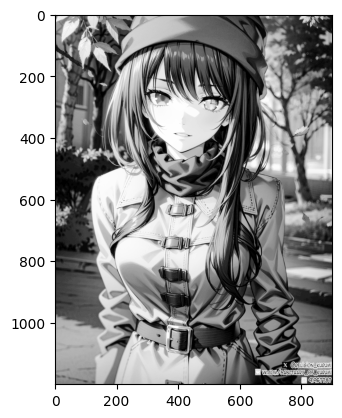

In [32]:
plt.imshow(result, cmap='gray')

menampilkan citra spesifikasi terhadap kurumi

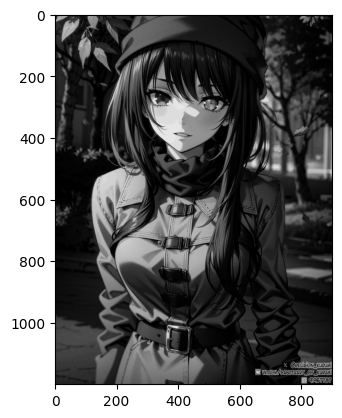

In [34]:
plt.imshow(result1, cmap='gray')

menampilkan citra spesifikasi terhadap kurumi

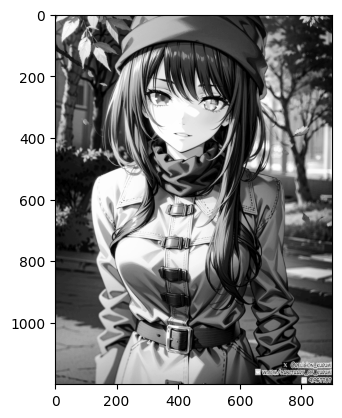

In [35]:
plt.imshow(result2, cmap='gray')

## MEMECAH CITRA SENHE

In [36]:
def split_image(image, num_rows, num_cols):
    height, width = image.shape[:2]
    split_height = height // num_rows
    split_width = width // num_cols
    pieces = []
    for i in range(num_rows):
        for j in range(num_cols):
            start_row = i * split_height
            end_row = start_row + split_height
            start_col = j * split_width
            end_col = start_col + split_width
            pieces.append(image[start_row:end_row, start_col:end_col])
    return pieces

def average_brightness(image_piece):
    return np.mean(image_piece)

shenhe_pieces = split_image(Gambarabu, 2, 2)


merupakan metode untuk membagi gambar berdasarkan parameter image, num_rows dan num_cols untuk ukuran banyak potongan dibuat.
 membuat var height dan width berdarsarkan ukuran dari gambar dipakai. menghitung tinggi dan lebar dari setiap potongan gambar dengan membagi sesaui dengan jumlah baris dan kolom yang ada. membuat var array kosong untuk menyimpan hasil for loop untuk potongan gambar.

 for loop pertama untuk looping baris potongan dan kedua untuk kolom pada potongan. kemudia melakukan perhitungan index mulai dari awal baris dengan mengalikan i dengan hasil hitung pembagian tinggi dan index akhir baris dengan menjumlahkan index awal dengan denngan hasil pembagian index. hal yang sama dipakai untuk kolom.

 hasil dari perhitungan akan di tambahkan pada array kosong dengan mengikuti isi dari pixel posisi ke awal-akhir baris dan awal-akhir kolom dari sebuah gambar.
 dan mengembalikan array yang terisi.


kemudian metode avarage_brigtheness dipakai untuk mendapatkan nilai rata-rata intensitas pixel dari potongan gambar yang dimiliki dengan memakai np.mean.

membuat variabel yang akan menyimpan hasil pemotongan gambar.

In [37]:
def adjust_brightness(piece, target_image):
    piece_brightness = average_brightness(piece)
    target_brightness = average_brightness(target_image)
    brightness_diff = target_brightness - piece_brightness
    adjusted_piece = piece + brightness_diff
    adjusted_piece = np.clip(adjusted_piece, 0, 255).astype(np.uint8)
    return adjusted_piece

metode adjust_brightness digunakan untuk menyesuaiakn kecerahan dari potongan gambar berdasarkan citra target. 
 membuat 2 variabel yang akan menyimpan tingkat kecerahan dari masing masing citra berdasarkan operasi dari average_brightness.
 brightness_diff dipakai untuk mencari perbedaan selisih kecerahan antar rata-rata yang dimiliki gambar.
 adjusted_piece digunakan untuk menyimpah hasil penyesuaian kecerahan dengan menjumlahkan perbedaan selisih dengan potongan gambar aslinya. kemudian akan disesuaikan dengan nilai kecerahan yang ada dalam rentang yang valid antara 0-255


In [38]:
adjusted_pieces = []
for piece in shenhe_pieces:
    piece_brightness = average_brightness(piece)
    if piece_brightness > 127:  
        adjusted_piece = adjust_brightness(piece, Gambarabukurumi)
    else:  
        adjusted_piece = adjust_brightness(piece, Gambarabumegumin)
    adjusted_pieces.append(adjusted_piece)

adjusted_shenhe = np.concatenate(adjusted_pieces, axis=0)

membuat var array kosong adjusted_pieces untuk menyimpan potongan yang telah disesuaikan. 
 melakukan for loop untuk setiap potongan gambar yang ada pada senhe_pieces untuk menghitung kecerahan rata-rata dari citra dengan average_brightness. 
 lalu memeriksa hasilnya dan jika lebih dari 127 akan memakai penyesuaian pada gambar kurumi, jika tidak akan memaki gambar megumin.
 hasil penyesuaian ditambahkan  pada adjusted_pieces degan secara uru dari sumbu 0.

menampilkan hasil penyesuaian adjusted_senhe dengan fokus warna pada abu-abu.

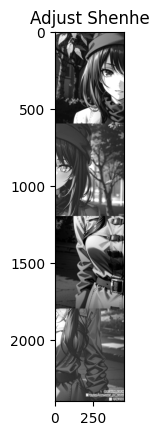

In [39]:
plt.title('Adjust Shenhe')
plt.imshow(adjusted_shenhe, cmap='gray')